In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import time
import math
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import GroupKFold
from tqdm import tqdm
from sklearn.utils import shuffle
import sklearn 
from sklearn import svm, tree, linear_model, neighbors, naive_bayes, ensemble, discriminant_analysis, gaussian_process
from xgboost import XGBClassifier
from sklearn import feature_selection
from sklearn import model_selection
from sklearn import metrics
from sklearn.preprocessing import StandardScaler
from numpy.fft import *

In [9]:
import warnings
warnings.filterwarnings('ignore')

In [8]:
X_train = pd.read_csv("./X_train.csv")
y_train = pd.read_csv("./y_train.csv")
X_test = pd.read_csv('./X_test.csv')

In [16]:
A = X_train.angular_velocity_Z.values[0:255]
fft = np.fft.fft(A)
PSD = np.abs(fft)


Text(0.5, 0, 'Frequency')

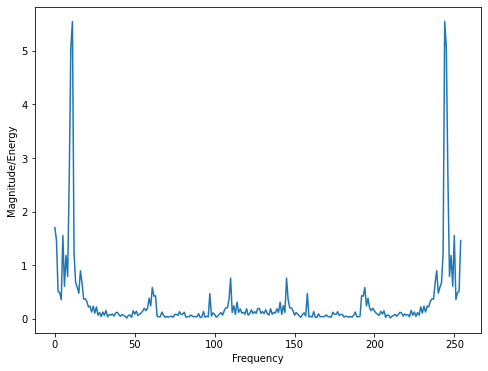

In [21]:

plt.figure(figsize=(8,6))
plt.plot(PSD)
plt.ylabel("Magnitude/Energy")
plt.xlabel("Frequency")

In [18]:
B = PSD > 1
C = PSD * B

Text(0.5, 0, 'Frequency')

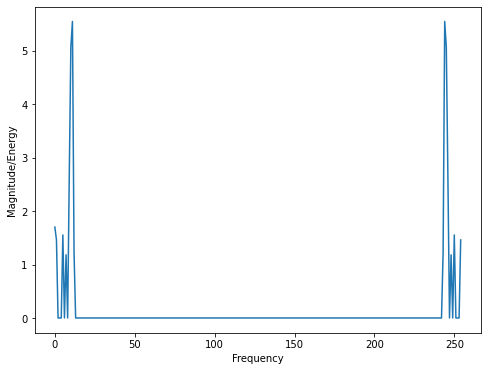

In [22]:
plt.figure(figsize=(8,6))
plt.plot(C)
plt.ylabel("Magnitude/Energy")
plt.xlabel("Frequency")

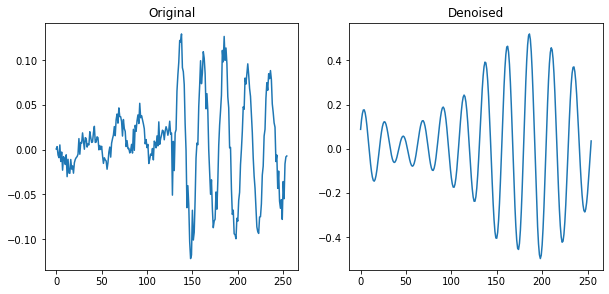

In [23]:
plt.figure(figsize=(10,10))
plt.subplot(221)
plt.plot(A)
plt.title("Original")
plt.subplot(222)
plt.title("Denoised")
plt.plot(np.fft.ifft(fft*C))


In [4]:
# from @theoviel at https://www.kaggle.com/theoviel/fast-fourier-transform-denoising
def filter_signal(signal, threshold=1e3):
    fourier = rfft(signal)
    frequencies = rfftfreq(signal.size, d=20e-3/signal.size)
    fourier[frequencies > threshold] = 0
    return irfft(fourier)

In [5]:
X_train_denoised = X_train.copy()

# train
for col in X_train.columns:
    if col[0:3] == 'ang' or col[0:3] == 'lin':
        # Apply filter_signal function to the data in each series
        denoised_data = X_train.groupby(['series_id'])[col].apply(lambda x: filter_signal(x))
        
        # Assign the denoised data back to X_train
        list_denoised_data = []
        for arr in denoised_data:
            for val in arr:
                list_denoised_data.append(val)
                
        X_train_denoised[col] = list_denoised_data
        


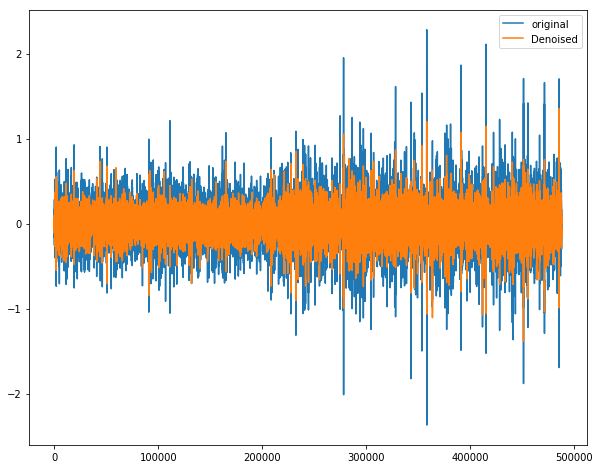

In [7]:
plt.figure(figsize = (10,8))
plt.plot(X_train.angular_velocity_X[:], label = 'original')
plt.plot(X_train_denoised.angular_velocity_X[:], label = 'Denoised')
plt.legend()

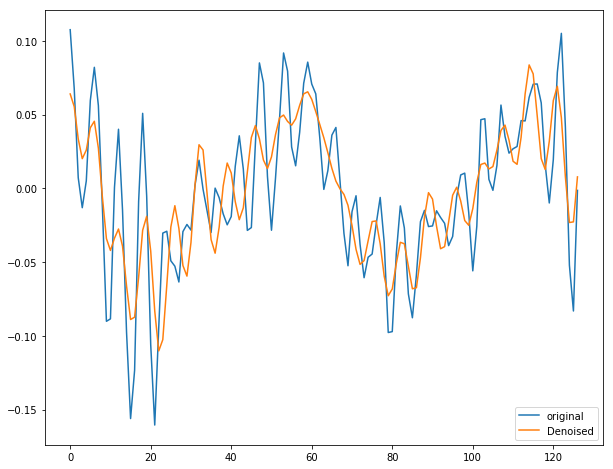

In [6]:
plt.figure(figsize = (10,8))
plt.plot(X_train.angular_velocity_X[:127], label = 'original')
plt.plot(X_train_denoised.angular_velocity_X[:127], label = 'Denoised')
plt.legend()

In [15]:
# X_train_denoised.to_csv('X_train_denoised.csv', index=False)
# X_test_denoised.to_csv('train_denoised.csv', index=False)